数据基本信息：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

不同乘客等级的生还率：
   乘客等级       生还率
0     1  0.629630
1     2  0.472826
2     3  0.242363


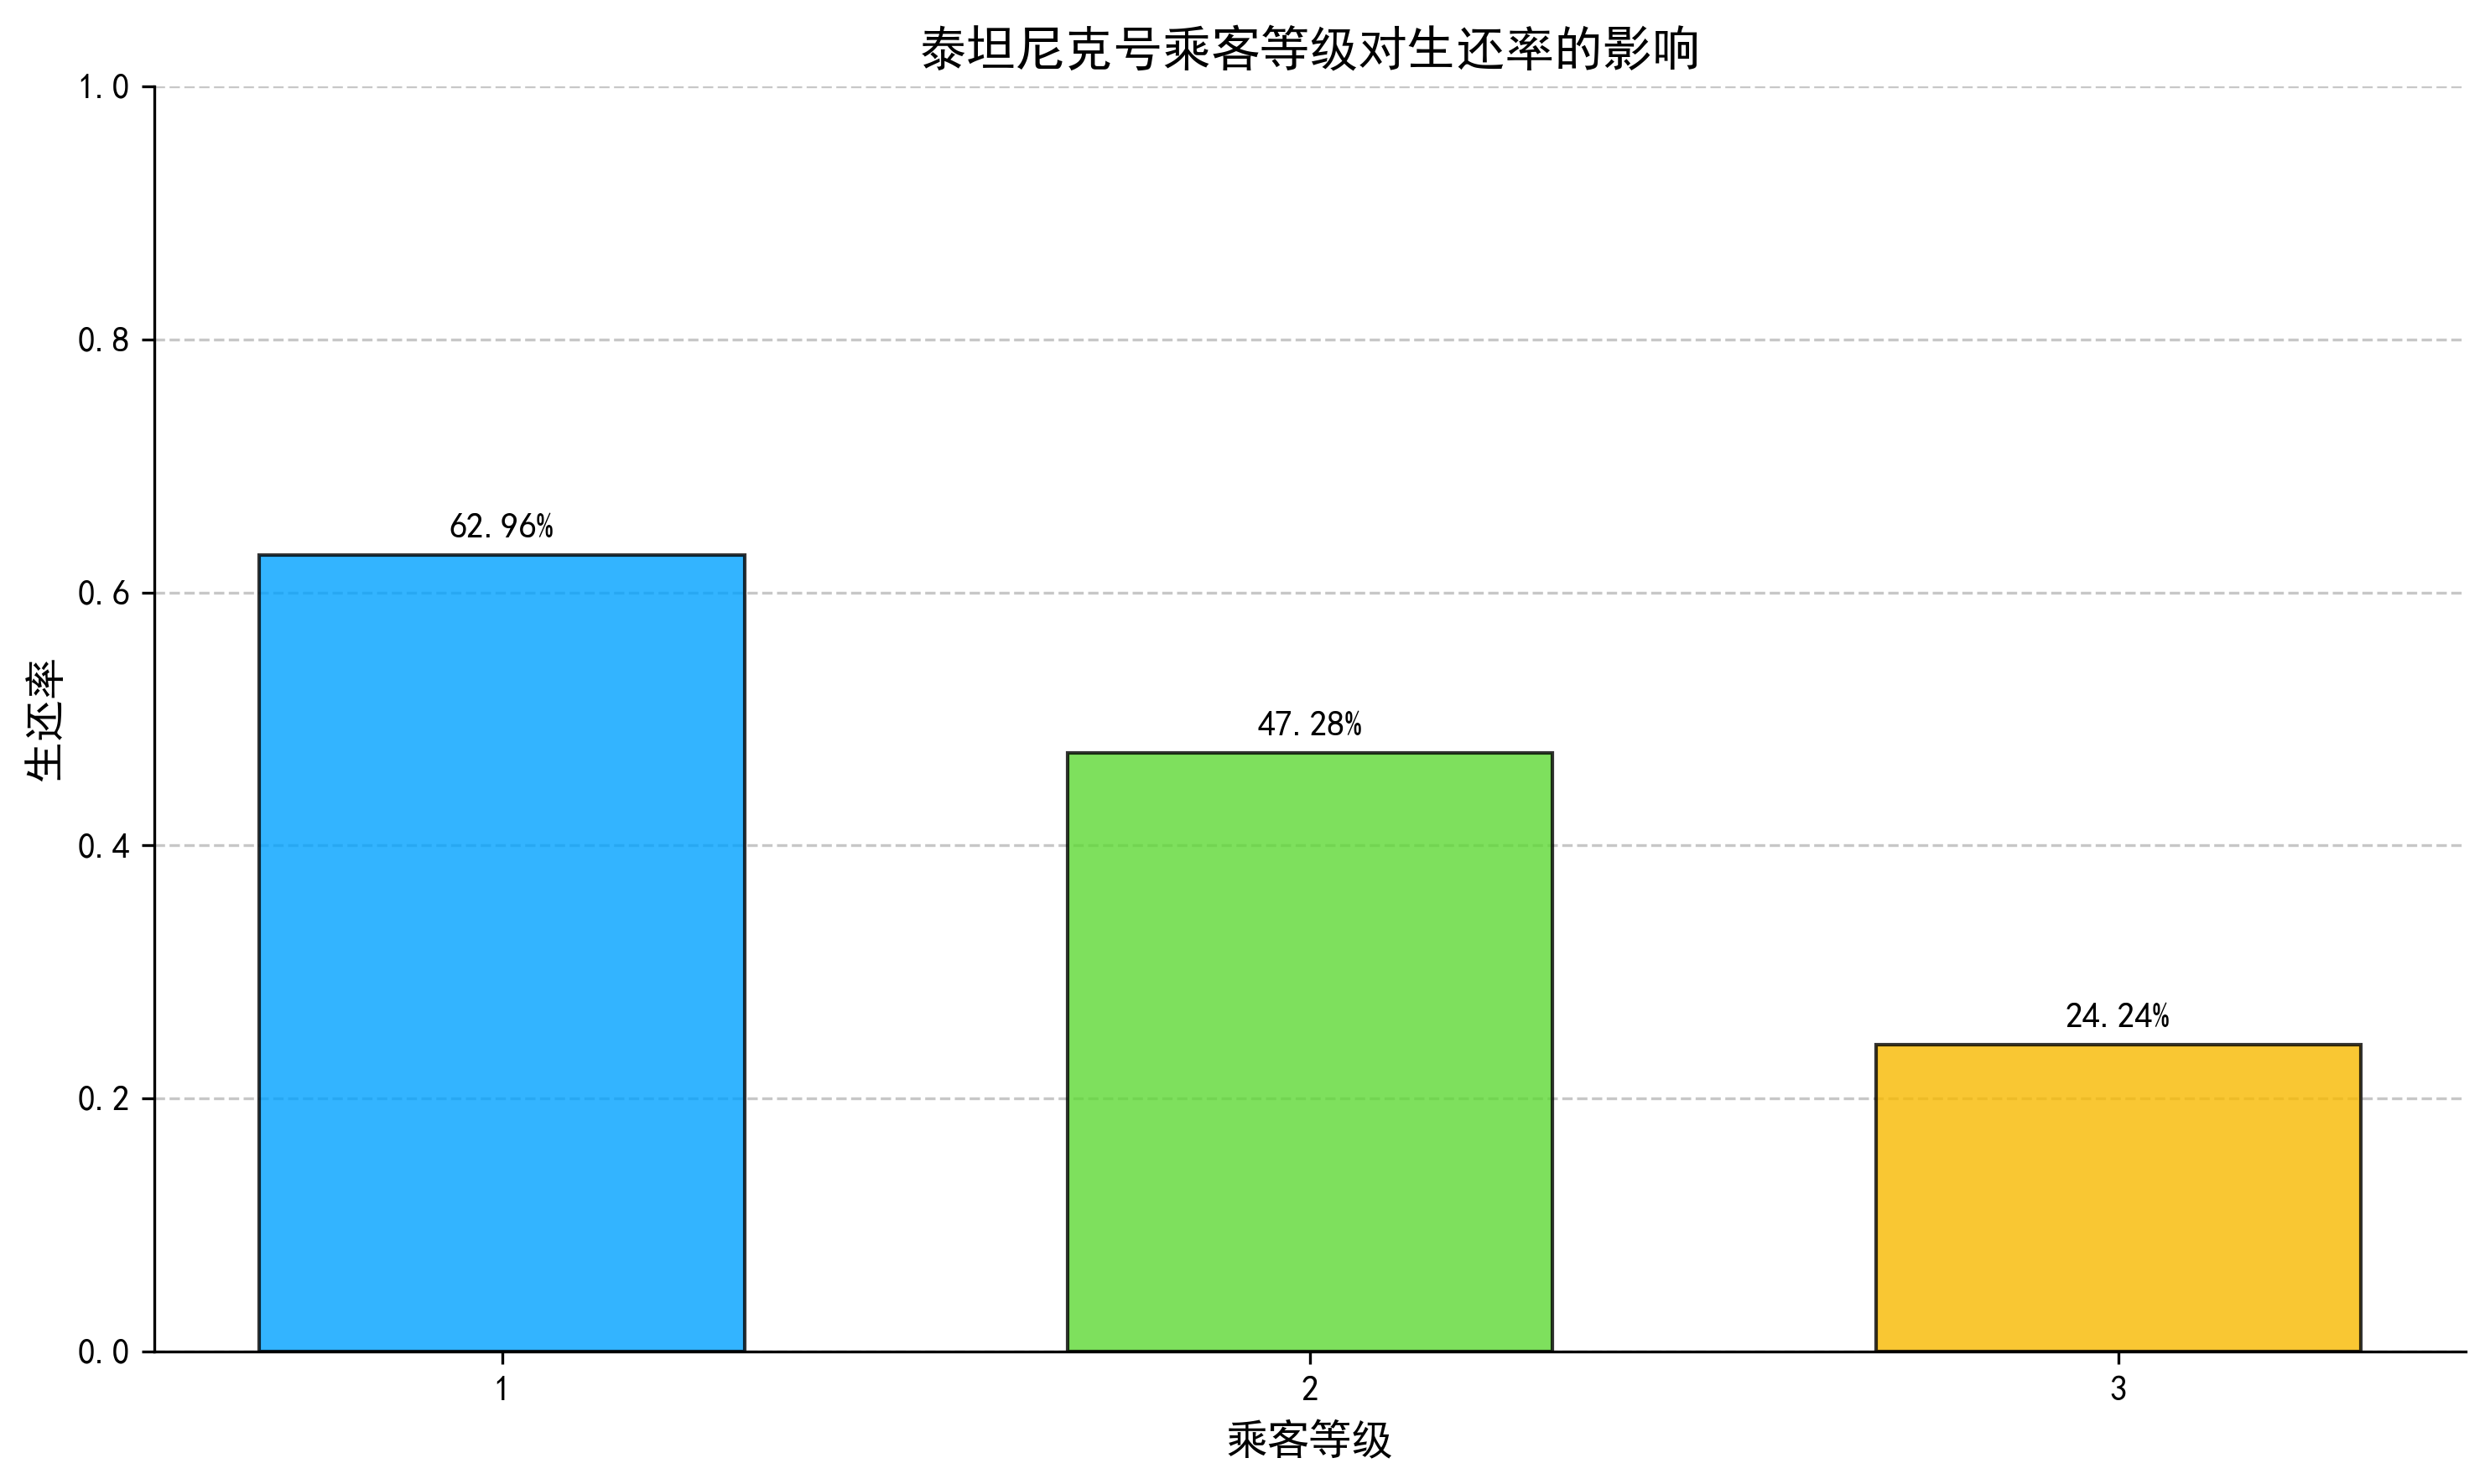

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 设置图片清晰度
plt.rcParams['figure.dpi'] = 300

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei', 'WenQuanYi Micro Hei', 'Heiti TC']

# 文件路径（请根据实际情况修改）
file_path = r"C:\Users\HONOR\Desktop\train.csv"

try:
    # 读取CSV文件
    df = pd.read_csv(file_path)
    
    # 查看数据基本信息
    print("数据基本信息：")
    df.info()
    
    # 查看数据集行数和列数
    rows, columns = df.shape
    
    if rows == 0:
        print("错误：数据集中没有记录")
    else:
        # 计算不同乘客等级的生还率
        survival_by_class = df.groupby('Pclass')['Survived'].mean().reset_index()
        
        # 重命名列以便更好地理解
        survival_by_class.columns = ['乘客等级', '生还率']
        
        # 显示计算结果
        print("\n不同乘客等级的生还率：")
        print(survival_by_class)
        
        # 绘制直方图
        plt.figure(figsize=(10, 6))
        
        # 设置柱状图参数
        bars = plt.bar(
            survival_by_class['乘客等级'],
            survival_by_class['生还率'],
            color=['#00A1FF', '#5ed935', '#f8ba00'],  # 使用不同颜色区分等级
            width=0.6,
            edgecolor='black',
            alpha=0.8,
            zorder=2
        )
        
        # 在每个柱子上方显示具体数值
        for bar in bars:
            height = bar.get_height()
            plt.text(
                bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.2%}',
                ha='center', va='bottom', fontsize=10
            )
        
        # 添加标题和标签
        plt.title('泰坦尼克号乘客等级对生还率的影响', fontsize=14)
        plt.xlabel('乘客等级', fontsize=12)
        plt.ylabel('生还率', fontsize=12)
        
        # 设置x轴刻度为整数1, 2, 3
        plt.xticks(survival_by_class['乘客等级'])
        
        # 设置y轴范围为0-1
        plt.ylim(0, 1)
        
        # 添加网格线
        plt.grid(axis='y', linestyle='--', alpha=0.7, zorder=1)
        
        # 优化图表样式
        plt.gca().spines['top'].set_visible(False)
        plt.gca().spines['right'].set_visible(False)
        
        # 显示图形
        plt.tight_layout()
        plt.show()

except FileNotFoundError:
    print(f"错误：文件 {file_path} 不存在，请检查文件路径是否正确。")
except Exception as e:
    print(f"处理数据时发生错误：{str(e)}")